## Plotting results in Julia

More documentation about the `Plots` package is [here](https://docs.juliaplots.org/latest/tutorial/). There are infinite ways of customizing the plots, feel free to explore. 

> NOTE:
> If you prefer this tutorial as a `.jl` file, just copy out the
> code bits and execute them there, with `#%%` to separate cells.

In [1]:
using Pkg;
Pkg.activate(".") # activate the environment in the "modelling" folder
Pkg.instantiate() # install the packages in the environment

  Activating project at `c:\Users\marai\OneDrive\Dokumente\Master\Masterarbeit\adv_env_econ_24\modelling`


The new packages that we use here are `Plots` and `LaTeXStrings`, the latter for formatting mathematical symbols nicely.

In [2]:
using Plots
using LaTeXStrings

Optional!!! Own command (MS):In case the Optimized Model has be run before, we have to delete OptMimi2016R2 and instead add MimiDICE2016R2.

In [ ]:
Pkg.rm("OptMimiDICE2016R2MimiDICE2016R2")

In [3]:

Pkg.add(url="https://github.com/anthofflab/MimiDICE2016R2.jl")

    Updating git-repo `https://github.com/anthofflab/MimiDICE2016R2.jl`
   Resolving package versions...
  No Changes to `C:\Users\marai\OneDrive\Dokumente\Master\Masterarbeit\adv_env_econ_24\modelling\Project.toml`
  No Changes to `C:\Users\marai\OneDrive\Dokumente\Master\Masterarbeit\adv_env_econ_24\modelling\Manifest.toml`


As usual, let's load an instance of the DICE model.

In [4]:
using Mimi
using MimiDICE2016R2

In [5]:
m_DICE = MimiDICE2016R2.get_model()
run(m_DICE)

Let's extract the time steps of the model into a vector.

In [6]:
timesteps = collect(Mimi.dimension(m_DICE, :time))
timesteps = [x[1] for x in timesteps];

Let's extract the emissions and temperature variables of the model into vectors.

In [7]:
E = m_DICE[:emissions, :E];
T = m_DICE[:climatedynamics, :TATM];

Let's make a simple plot. Note that both emissions and temperature are on the same y axis, which makes temperature changes hard to discern.

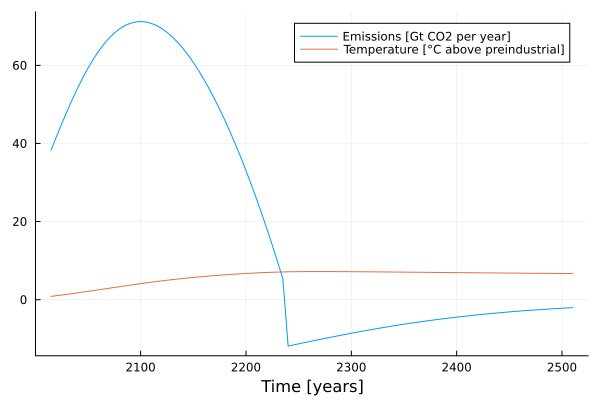

In [84]:
plot(timesteps, [E T], label=["Emissions [Gt CO2 per year]" "Temperature [°C above preindustrial]"], xlabel="Time [years]")

Let's extract Agricultural Emissions and Temperature variables of the model in vectors.

In [85]:
CUMETREE = m_DICE[:emissions, :CUMETREE];
T = m_DICE[:climatedynamics, :TATM];

Let's make a simple plot.

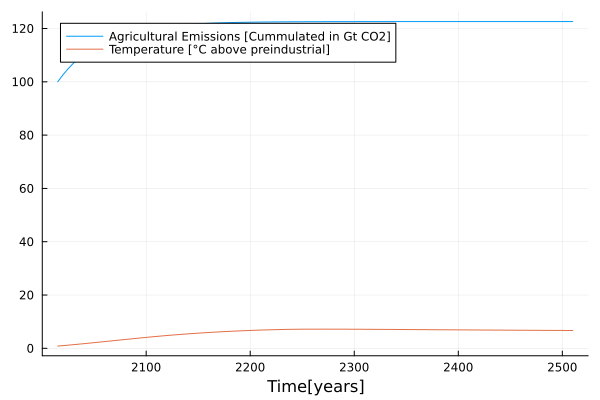

In [87]:
plot(timesteps, [CUMETREE T], label=["Agricultural Emissions [Cummulated in Gt CO2]" "Temperature [°C above preindustrial]"], xlabel="Time[years]")

Instead, with some more advanced plotting, we can also create a plot with two y axes but a shared x axis. This allows us to portray emissions and temperature on the same x axis, but on their respective y axes.

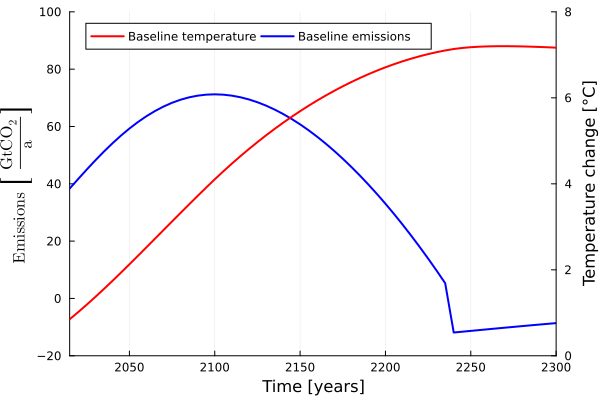

In [75]:
# Emissionsplot erstellen
pE = plot(timesteps, E, label=nothing, xlabel="Time [years]", ylabel=latexstring("\\mathrm{Emissions} \\ \\ \\left[\\frac{\\mathrm{Gt CO}_2}{\\mathrm{a}}\\right]"), color=:blue, lw=2)
# Zweite y-Achse erstellen
pT = twinx()
# Temperaturplot erstellen
plot!(pT, timesteps, T, label="Baseline temperature", color=:red, lw=2, ylabel="Temperature change [°C]") #Hier ist Label schon dabei. Warum?
# Legende Graphen (nur Emissionen) hinzufügen
plot!(pT, [], [], label="Baseline emissions", linecolor=:blue, lw=2)
# Grenzen setzen
xlims!((2015, 2300))
ylims!(pE, (-20, 100))
ylims!(pT, (0, 8))
plot!(pT, legendcolumns=2)

Now let's change climate sensitivity and see how results change.

In [37]:
m_lowCS = MimiDICE2016R2.get_model()
update_param!(m_lowCS, :climatedynamics, :t2xco2, 2)
run(m_lowCS)

In [38]:
E_lowCS = m_lowCS[:emissions, :E];
T_lowCS = m_lowCS[:climatedynamics, :TATM];

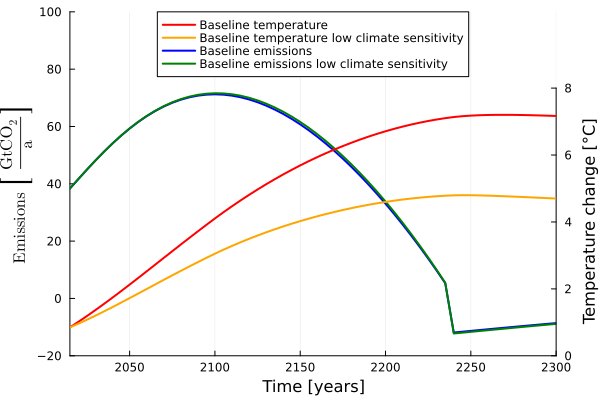

In [39]:
pE = plot(timesteps, [E E_lowCS], label=nothing, xlabel="Time [years]", ylabel=latexstring("\\mathrm{Emissions} \\ \\ \\left[\\frac{\\mathrm{Gt CO}_2}{\\mathrm{a}}\\right]"), color=[:blue :green], lw=2)
pT = twinx()
plot!(pT, timesteps, [T T_lowCS], label=["Baseline temperature" "Baseline temperature low climate sensitivity"], color=[:red :orange], lw=2, ylabel="Temperature change [°C]")
plot!(pT, [], [], label="Baseline emissions", linecolor=:blue, lw=2)
plot!(pT, [], [], label="Baseline emissions low climate sensitivity", linecolor=:green, lw=2)
xlims!((2015, 2300))
ylims!(pE, (-20, 100))
ylims!(pT, (0, 8))
plot!(pT, legend=:outertop, legendcolumns=1)

Let's try to understand this:

1. Temperatures are lower in a case of lower climate sensitivity — this makes total sense.
2. Emissions change a little, but not much. Why? In a welfare-optimising model, a lower climate sensitivity would lead to higher emissions — as the damages per emissions are lower, the social planner would be ready to accept more of them. But this version of DICE here does not optimise, so we shouldn't expect a change in emissions. To see this emissions reaction as a result of welfare optimisation, we'd need to rerun the code with OptMimiDICE2016R2, and run `optimise_model` after changing parameters. But why are the two emissions trajectories still not identical? The reason is that lower climate sensitivity leads to lower temperatures and hence lower damages. Lower damages imply higher GDP and emissions depend on GDP, hence they are slightly higher in the case of low climate sensitivity.

Let's try to change the Climate Sensitivity again. Now we assume that it is very high.

In [88]:
m_highCS = MimiDICE2016R2.get_model()
update_param!(m_highCS, :climatedynamics, :t2xco2, 5.5)
run(m_highCS)

In [89]:
E_highCS = m_highCS[:emissions, :E];
T_highCS = m_highCS[:climatedynamics, :TATM];

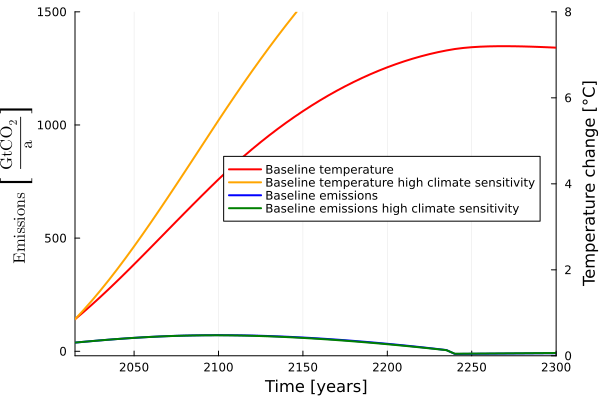

In [94]:
#Plot für Baseline Emissionen (E) und für Emissionen unter hoher CS (E_highCS) erstellen
pE = plot(timesteps, [E E_highCS], label=nothing, xlabel="Time [years]", ylabel=latexstring("\\mathrm{Emissions} \\ \\ \\left[\\frac{\\mathrm{Gt CO}_2}{\\mathrm{a}}\\right]"), color=[:blue :green], lw=2)
# Zweite y-Achse erstellen für Temperaturplot erstellen
pT = twinx()
# Plot für Baseline Temperatur (T) und für Temperatur unter hoher CS (T_highCS) erstellen
plot!(pT, timesteps, [T T_highCS], label=["Baseline temperature" "Baseline temperature high climate sensitivity"], color=[:red :orange], lw=2, ylabel="Temperature change [°C]") # Hier ist Label schon dabei. Warum?
# Legenden für Graphen (nur Emissionen) hinzufügen
plot!(pT, [], [], label="Baseline emissions", linecolor=:blue, lw=2) # Name, Farbe und Breite des Graphen angeben. Leere Klammern stehen dafür, dass hier keine neuen Datenpunkte hinzugefügt werden, ist eben nur die Legende.
plot!(pT, [], [], label="Baseline emissions high climate sensitivity", linecolor=:green, lw=2)
# Achsengrenzen setzen
xlims!((2015, 2300))
ylims!(pE, (-20, 1500))
ylims!(pT, (0, 8))
plot!(pT, legend=:right, legendcolumns=1) # Die Legende wir rechts vom Graphen angezeigt

So jetzt die gleiche Modellierung nur auf einem anderen Weg, wobei die CS jetzt mittelhoch ist

In [10]:
m_middelCS = MimiDICE2016R2.get_model()
update_param!(m_middelCS, :climatedynamics, :t2xco2, 5.5)
run(m_middelCS)

In [11]:
#Namen für die Graphen, die wir plotten wollen erstellen
E_middelCS = m_middelCS[:emissions, :E];
T_middelCS = m_middelCS[:climatedynamics, :TATM];

Hier sehen wir was passiert, wenn wir die Graphen an der zweiten y-Achse (hier Temperaturplots), genau so programmieren wie auf der ersten y-Achse (hier Emissionen) Es funktioniert nicht, der Emissionsplot wird nicht angezeigt.

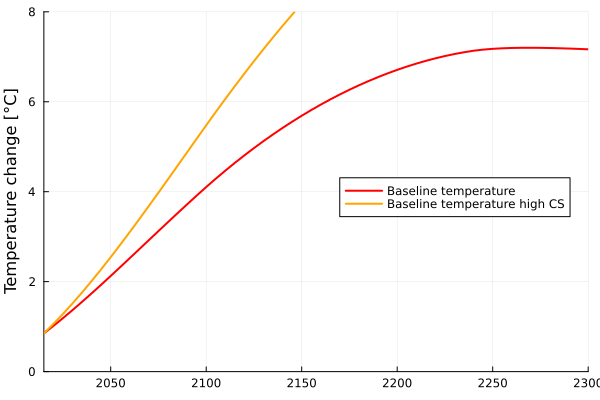

In [28]:
#Emissionsplot erstellen
pE=plot(timesteps, [E E_middelCS], label=["HUHU Emissionen" "Noch mehr"], xlabel="Time [years]", ylabel="Emissions in Gt CO2", color=[:blue], lw=2)
#Zweite y-Achse einführen
pT=twinx()
#Temperaturplot erstellen
pT=plot(timesteps, [T T_middelCS], label=["Baseline temperature" "Baseline temperature high CS"], ylabel="Temperature change [°C]", color=[:red :orange],lw=2)
#Achsengrenzen setzen
xlims!((2015,2300))
ylims!(pE, (-20, 1500))
ylims!(pT, (0,8))
# Position der Legende bestimmen
plot!(pT, legend=:right, legendcolums=1)


Wenn wir nicht nur bei dem zweiten Graphen auf der zweiten y-Achse eine Legende (label) direkt hinzufügen, sondern auch schon bei den ersten (erste y-Achse), dann werde zwei getrennte Legenden erzeugt.

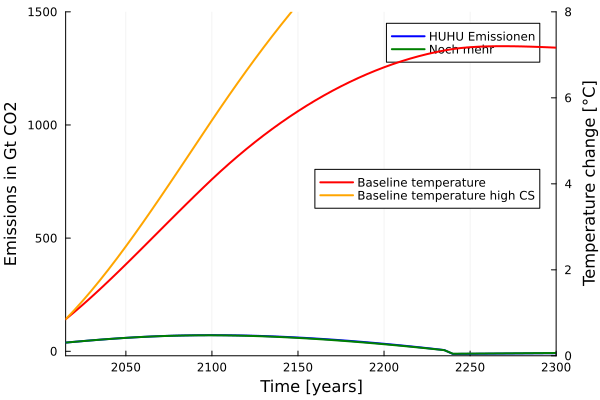

In [25]:
#Emissionsplot erstellen
pE=plot(timesteps, [E E_middelCS], label=["HUHU Emissionen" "Noch mehr"], xlabel="Time [years]", ylabel="Emissions in Gt CO2", color=[:blue :green], lw=2)
#Zweite y-Achse einführen
pT=twinx()
#Temperaturplot erstellen
plot!(pT,timesteps, [T T_middelCS], label=["Baseline temperature" "Baseline temperature high CS"], ylabel="Temperature change [°C]", color=[:red :orange],lw=2)
#Achsengrenzen setzen
xlims!((2015,2300))
ylims!(pE, (-20, 1500))
ylims!(pT, (0,8))
# Position der Legende bestimmen
plot!(pT, legend=:right, legendcolums=1)


Deswegen machen wir das ganze zu Übungszwecken jetzt noch einmal so wie sich das gehört.

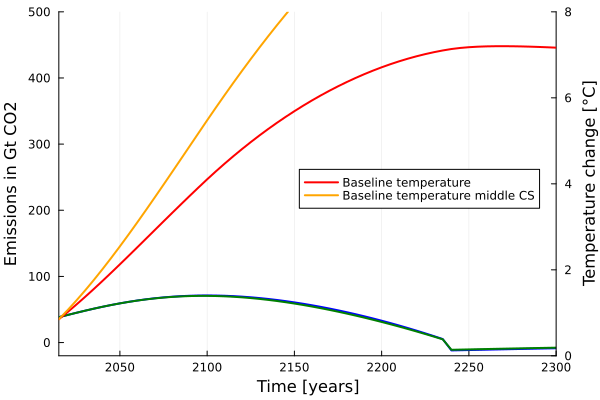

In [80]:
#Emissionsplot erstellen
pE=plot(timesteps, [E E_middelCS], label=nothing, xlabel="Time [years]", ylabel="Emissions in Gt CO2", color=[:blue :green], lw=2)
#Zweite y-Achse einführen
pT=twinx()
#Temperaturplot erstellen -> Wichtig hier pT angeben (und nicht pE), damit die Temperaturlinie auch an die richtige Achse geplottet wird
plot!(pT,timesteps, [T T_middelCS], label=["Baseline temperature" "Baseline temperature middle CS"], ylabel="Temperature change [°C]", color=[:red :orange],lw=2)
#Legende für Emissionsplot hinzufügen 
#(Ohne diesen Schritt werden nur die Temperturlinien als Legende angezeigt. Duch die Angabe von pT wird der Legende nun auch die Emissionslinien hinzugefügt.
plot!(pT,[],[], label="Baseline Emissionen", linecolor=:blue, lw=2)
plot!(pT,[],[], label="Baseline Emissionen middle CS", linecolor=:green, lw=2)
#Achsengrenzen setzen
xlims!((2015,2300))
ylims!(pE, (-20, 500))
ylims!(pT, (0,8))
# Position der Legende bestimmen
plot!(pT, legend=:right, legendcolums=1)

Hier nochmal ein Versuch das Legenden Problem anders zu lösen. (Es zeigt sich: Es klappt nicht.)

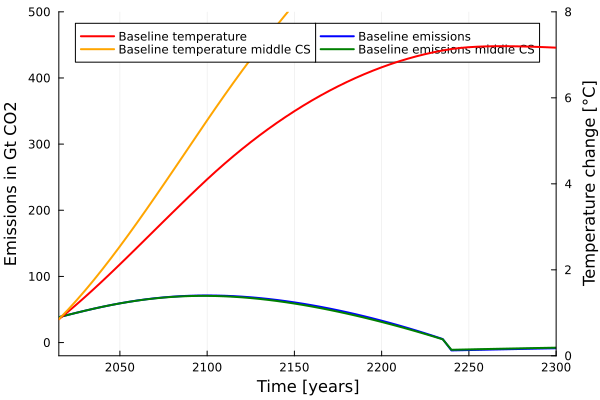

In [79]:
#Emissionsplot erstellen
pE=plot(timesteps, [E E_middelCS], label=["Baseline emissions" "Baseline emissions middle CS"], xlabel="Time [years]", ylabel="Emissions in Gt CO2", color=[:blue :green], lw=2)
#Zweite y-Achse einführen
pT=twinx(pE)
#Temperaturplot erstellen
plot!(pT,timesteps, [T T_middelCS], label=["Baseline temperature" "Baseline temperature middle CS"], ylabel="Temperature change [°C]", color=[:red :orange],lw=2)
#Achsengrenzen setzen
xlims!(pE, (2015,2300))
ylims!(pE, (-20, 500))
ylims!(pT, (0,8))
# Legenden kombinieren
# Funktioniert nicht: Chapt GDP bietet keine Lösung an die funktioniert Deswegen so machen wie oben (wie von Felix vorgemacht)
# Das bedeutet: Bei Emissionen zunächst kein Label hinzufügen und dann später einfach in die Legende von pT ohne Datenpunkte dazuplotten.